<a href="https://colab.research.google.com/github/Fukkatsuso/livedoornews-topicmodel/blob/master/topicmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# トピックモデル

## Goal
- ライブドアコーパスでWeb記事分類器を作る

## Step
1. ライブドアコーパスをスクレイピング
1. データの前処理
  1. 形態素解析 => **MeCab** (+NEologd)
  1. 不要語の削除, 語の統一(ステミング)
1. トピックモデルの構築 => **gensim**
1. 機械学習 => **sklearn**

## 参考
- [LDAによるトピックモデル with gensim ~ Qiitaのタグからユーザーの嗜好を考える ~](https://qiita.com/shizuma/items/44c016812552ba8a8b88)
- [トピックモデルをザックリと理解してサクッと試した](https://qiita.com/d-ogawa/items/c423cd4b01c6ed84a5e7)
- [WordCloudとpyLDAvisによるLDAの可視化について](http://www.ie110704.net/2018/12/29/wordcloud%E3%81%A8pyldavis%E3%81%AB%E3%82%88%E3%82%8Blda%E3%81%AE%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6/)
- [自然言語処理による文書分類の基礎の基礎、トピックモデルを学ぶ](https://qiita.com/icoxfog417/items/7c944cb29dd7cdf5e2b1)
- [scikit-learnとgensimでニュース記事を分類する](https://qiita.com/yasunori/items/31a23eb259482e4824e2)
- [文書分類で自然言語処理に触れる](https://colab.research.google.com/drive/1IMjc-RTesapfNCEh0TPmg_ce_qAcV95b#scrollTo=9a9CUjgUXgB6)
- [自然言語処理における前処理の種類とその威力](https://qiita.com/Hironsan/items/2466fe0f344115aff177)
- [Python3×日本語：自然言語処理の前処理まとめ](https://qiita.com/chamao/items/7edaba62b120a660657e)
- [ニュース記事の分類を機械学習で予測する](https://qiita.com/hyo_07/items/ba3d53868b2f55ed9941)
- [LDA実践編：20newsgroupsでサクッとトピックモデリング](https://www.dendoron.com/boards/59)
- [Matplotlib が PC で追加のフォントをインストールしなくても日本語を表示できるようになった](https://qiita.com/yniji/items/2f0fbe0a52e3e067c23c)

## データ収集
### 対象
- [livedoorニュースコーパス](https://www.rondhuit.com/download.html#ldcc)
  - [トピックニュース](http://news.livedoor.com/category/vender/news/)
  - [Sports Watch](http://news.livedoor.com/category/vender/208/)
  - [ITライフハック](http://news.livedoor.com/category/vender/223/)
  - [家電チャンネル](http://news.livedoor.com/category/vender/kadench/)
  - [MOVIE ENTER](http://news.livedoor.com/category/vender/movie_enter/)
  - [独女通信](http://news.livedoor.com/category/vender/90/)
  - [エスマックス](http://news.livedoor.com/category/vender/smax/)
  - [livedoor HOMME](http://news.livedoor.com/category/vender/homme/)
  - [Peachy](http://news.livedoor.com/category/vender/ldgirls/)


In [0]:
# Get dataset
!wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz
!mkdir -p dataset/livedoor && tar xvzf ldcc-20140209.tar.gz -C /content/dataset/livedoor --strip-components 1
!rm ldcc-20140209.tar.gz

# Install MeCab
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

# Install mecab-ipadic-NEologd
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

!pip install mojimoji

# Japanese font
!apt-get -y install fonts-ipafont-gothic
# !ls /usr/share/fonts/truetype/

In [0]:
# 確認
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

## 1.前処理なしLDA

In [0]:
import gensim
import glob2
import MeCab

mecab = MeCab.Tagger("-Owakati -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")

paths = glob2.glob("dataset/livedoor/sports-watch/*-*.txt")

In [0]:
words = []
for path in paths:
  data = open(path, 'r', encoding="utf-8").read().split('\n')
  title = data[2]
  words.append(mecab.parse(title).split())

In [0]:
# 辞書, コーパス作成
dictionary = gensim.corpora.Dictionary(words)

dictionary.save_as_text("dictionary1.dict.txt")

corpus = [dictionary.doc2bow(w) for w in words]

In [18]:
# LDA
topic_N = 10
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=topic_N, id2word=dictionary)

for i in range(topic_N):
  print('TOPIC:', i, '=>', lda.print_topic(i))

TOPIC: 0 => 0.053*"、" + 0.032*"の" + 0.031*"Sports" + 0.031*"Watch" + 0.031*"「" + 0.031*"】" + 0.031*"【" + 0.030*"」" + 0.029*"は" + 0.028*"に"
TOPIC: 1 => 0.049*"【" + 0.048*"Sports" + 0.046*"】" + 0.046*"Watch" + 0.028*"が" + 0.026*"」" + 0.026*"「" + 0.023*"、" + 0.021*"に" + 0.018*"の"
TOPIC: 2 => 0.035*"は" + 0.035*"Sports" + 0.033*"Watch" + 0.033*"】" + 0.033*"【" + 0.028*"、" + 0.026*"の" + 0.021*"た" + 0.017*"に" + 0.017*"」"
TOPIC: 3 => 0.051*"の" + 0.041*"に" + 0.040*"】" + 0.040*"Watch" + 0.038*"、" + 0.038*"【" + 0.038*"Sports" + 0.025*"「" + 0.024*"が" + 0.024*"」"
TOPIC: 4 => 0.028*"の" + 0.025*"は" + 0.025*"に" + 0.024*"「" + 0.023*"」" + 0.023*"が" + 0.021*"、" + 0.019*"た" + 0.018*"も" + 0.016*"・"
TOPIC: 5 => 0.021*"Watch" + 0.021*"を" + 0.021*"】" + 0.021*"Sports" + 0.021*"【" + 0.017*"「" + 0.017*"」" + 0.016*"、" + 0.013*"の" + 0.011*"で"
TOPIC: 6 => 0.010*"、" + 0.009*"を" + 0.009*"が" + 0.007*"？" + 0.005*"た" + 0.005*"Sports" + 0.005*"【" + 0.005*"】" + 0.005*"Watch" + 0.005*"で"
TOPIC: 7 => 0.027*"の" + 0.025*"「" + 

## 2.前処理ありLDA

1. 正規化
  - 半角かな => 全角かな
  - 全角英数 => 半角英数
  - 大文字 => 小文字
  - 辞書による統一?
1. 品詞で取捨選択
1. ストップワード除去
  - 辞書
    - [SlothLib](http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt)

In [0]:
import gensim
import glob2
import mojimoji
import nltk
import MeCab
import re
import urllib3

from sklearn.model_selection import train_test_split

nltk.download('stopwords')

mecab = MeCab.Tagger("mecabrc -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")

paths = glob2.glob("dataset/livedoor/*/*-*.txt")

# 学習用と評価用に分ける
train_rate = 0.7
random_state = 0
train_article_paths, test_article_paths = train_test_split(paths, train_size=train_rate, random_state=random_state)

In [0]:
# カテゴリごとの記事数の分散
def deviation(random_state, article_paths):
  cat = {}
  for path in article_paths:
    c = path.split('/')[2]
    if cat.get(c) == None:
      cat[c] = 0
    else:
      cat[c] += 1

  avr = 0
  for c in cat:
    avr += cat[c]
  avr /= len(cat)

  d = 0
  for c in cat:
    d += (cat[c]-avr)**2

  return d

In [0]:
# ストップワードのリスト
def get_stopwords():
  # SlothLib
  slothlib_url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
  http = urllib3.PoolManager()
  res = http.request('GET', slothlib_url)
  stopwords = res.data.decode('utf-8').split()
  # nltk
  stopwords.extend(nltk.corpus.stopwords.words("english"))
  # 自分で設定
  swlist = ['さ', 'の', 'ら', 'ん']
  stopwords.extend(swlist)
  return stopwords

stopwords = get_stopwords()

In [0]:
# 単語のリストから品詞を限定して取り出す
def extract_by_parts(parsed, parts):
  words = []
  lines = parsed.split('\n')
  for line in lines:
    feature = line.split('\t')
    if len(feature) < 2:
      continue
    info = feature[1].split(',')
    if info[0] in parts:
      if info[6] == '*': 
        words.append(feature[0])  # 活用なしの語
      else:  
        words.append(info[6]) # 表記ゆれの対処
  return words

# 各単語を前処理にかける
def preprocess_words(words):
  for i in range(len(words)):
    words[i] = unify_chartype(words[i])
  words = filter_num(words)
  words = filter_stopwords(words)
  return words

# 文字種を統一する
def unify_chartype(text):
  text = mojimoji.zen_to_han(text, kana=False, digit=True, ascii=True) # 全角英数=>半角英数
  text = mojimoji.han_to_zen(text, kana=True, digit=False, ascii=False) # 半角かな=>全角かな
  text = text.lower() # 大文字=>小文字
  text = re.sub('\d+', '0', text)  # 数字列を0に置き換え
  return text

# 数字を含む単語を除去する
def filter_num(words):
  filtered_words = [word for word in words if '0' not in word]
  return filtered_words

# ストップワードを除去する
def filter_stopwords(words):
  filtered_words = [word for word in words if word not in stopwords]
  return filtered_words

In [0]:
# テキストを分解して品詞で絞り込み，各単語を前処理したリストを返す
def text2words(text, parts):
  parsed_text = mecab.parse(text)
  words = extract_by_parts(parsed_text, parts)
  words = preprocess_words(words)
  return words

# 取り出す品詞
parts = ['名詞']

# # 記事タイトルから学習に必要な単語を取り出す
# train_words = []
# for path in train_article_paths:
#   data = open(path, 'r', encoding="utf-8").read().split('\n')
#   words = text2words(data[2], parts)
#   train_words.append(words)

# # テスト用
# test_words = []
# for path in test_article_paths:
#   data = open(path, 'r', encoding="utf-8").read().split('\n')
#   words = text2words(data[2], parts)
#   test_words.append(words)

# 本文から抽出
train_words = []
for path in train_article_paths:
  data = open(path, 'r', encoding="utf-8").read().split('\n')
  words = []
  for line in data[3:]:
    words.extend(text2words(line, parts))
  train_words.append(words)

# テスト用
test_words = []
for path in test_article_paths:
  data = open(path, 'r', encoding="utf-8").read().split('\n')
  words = []
  for line in data[3:]:
    words.extend(text2words(line, parts))
  test_words.append(words)

In [0]:
def words2corpus(dictionary, words):
  return [dictionary.doc2bow(w) for w in words]

# 辞書作成
dictionary = gensim.corpora.Dictionary(train_words)
dictionary.filter_extremes(no_below=10, no_above=0.2)
dictionary.save_as_text("dictionary2.dict.txt")

# コーパス作成
train_corpus = words2corpus(dictionary, train_words)
# テスト用
test_corpus = words2corpus(dictionary, test_words)

In [0]:
# tf-idf
tfidf = gensim.models.TfidfModel(train_corpus)

train_corpus_tfidf = tfidf[train_corpus]
test_corpus_tfidf = tfidf[test_corpus]

In [102]:
# LDA
topic_N = 13
lda = gensim.models.ldamodel.LdaModel(corpus=train_corpus, num_topics=topic_N, id2word=dictionary, random_state=0)

for i in range(topic_N):
  print('TOPIC:', i, '=>', lda.print_topic(i))

TOPIC: 0 => 0.008*"画面" + 0.007*"表示" + 0.006*"アプリ" + 0.006*"blog" + 0.005*"選手" + 0.005*"facebook" + 0.004*"クリック" + 0.004*"チェック" + 0.004*"公開" + 0.004*"ファイル"
TOPIC: 1 => 0.029*"更新" + 0.023*"ソフトウェア" + 0.013*"アップデート" + 0.011*"利用" + 0.009*"転職" + 0.007*"設定" + 0.007*"表示" + 0.007*"ダウンロード" + 0.006*"データ" + 0.006*"対応"
TOPIC: 2 => 0.006*"試合" + 0.006*"選手" + 0.005*"韓国" + 0.005*"google" + 0.005*"氏" + 0.004*"放送" + 0.004*"結果" + 0.004*"ロゴ" + 0.004*"サッカー" + 0.003*"チーム"
TOPIC: 3 => 0.010*"キャンペーン" + 0.010*"iphone" + 0.009*"応募" + 0.008*"ゴルフ" + 0.008*"プレゼント" + 0.008*"当選" + 0.007*"アプリ" + 0.007*"女子" + 0.006*"人気" + 0.004*"賞品"
TOPIC: 4 => 0.025*"映画" + 0.016*"公開" + 0.008*"作品" + 0.007*"本作" + 0.007*"監督" + 0.006*"movie" + 0.006*"役" + 0.005*"世界" + 0.005*"出演" + 0.005*"enter"
TOPIC: 5 => 0.007*"htc" + 0.006*"仕事" + 0.004*"年収" + 0.004*"採用" + 0.004*"one" + 0.004*"必要" + 0.004*"カメラ" + 0.004*"%" + 0.004*"機能" + 0.003*"ゴルフ"
TOPIC: 6 => 0.013*"アプリ" + 0.012*"機能" + 0.010*"smartphone" + 0.008*"android" + 0.007*"搭載" + 0.007*"写真" + 0

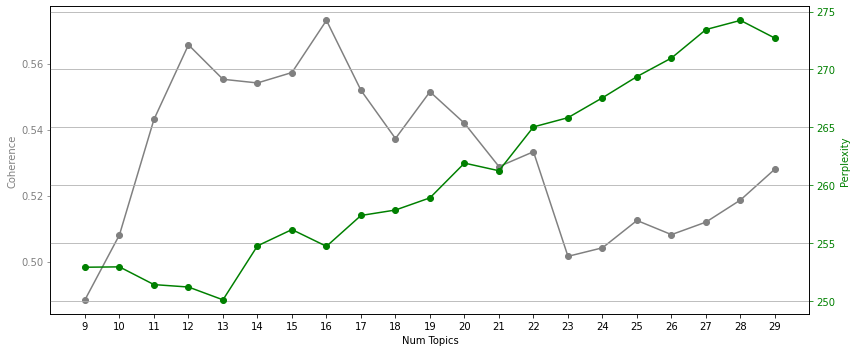

In [94]:
# LDAのトピック数の探索
import numpy as np
import matplotlib.pyplot as plt

start = 9
limit = 30
step = 1

coherence_vals = []
perplexity_vals = []

for n_topic in range(start, limit, step):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=n_topic, random_state=0)
  perplexity_vals.append(np.exp2(-lda_model.log_perplexity(train_corpus)))
  coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=train_words, dictionary=dictionary, coherence='c_v')
  coherence_vals.append(coherence_model_lda.get_coherence())

fig, ax1 = plt.subplots(figsize=(12,5))
x = range(start, limit, step)

c1 = 'gray'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1)
ax1.tick_params('y', colors=c1)

c2 = 'green'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2)
ax2.tick_params('y', colors=c2)

ax1.set_xticks(x)
fig.tight_layout()
plt.grid()
plt.show()

fig.savefig('topic_N_search.png')

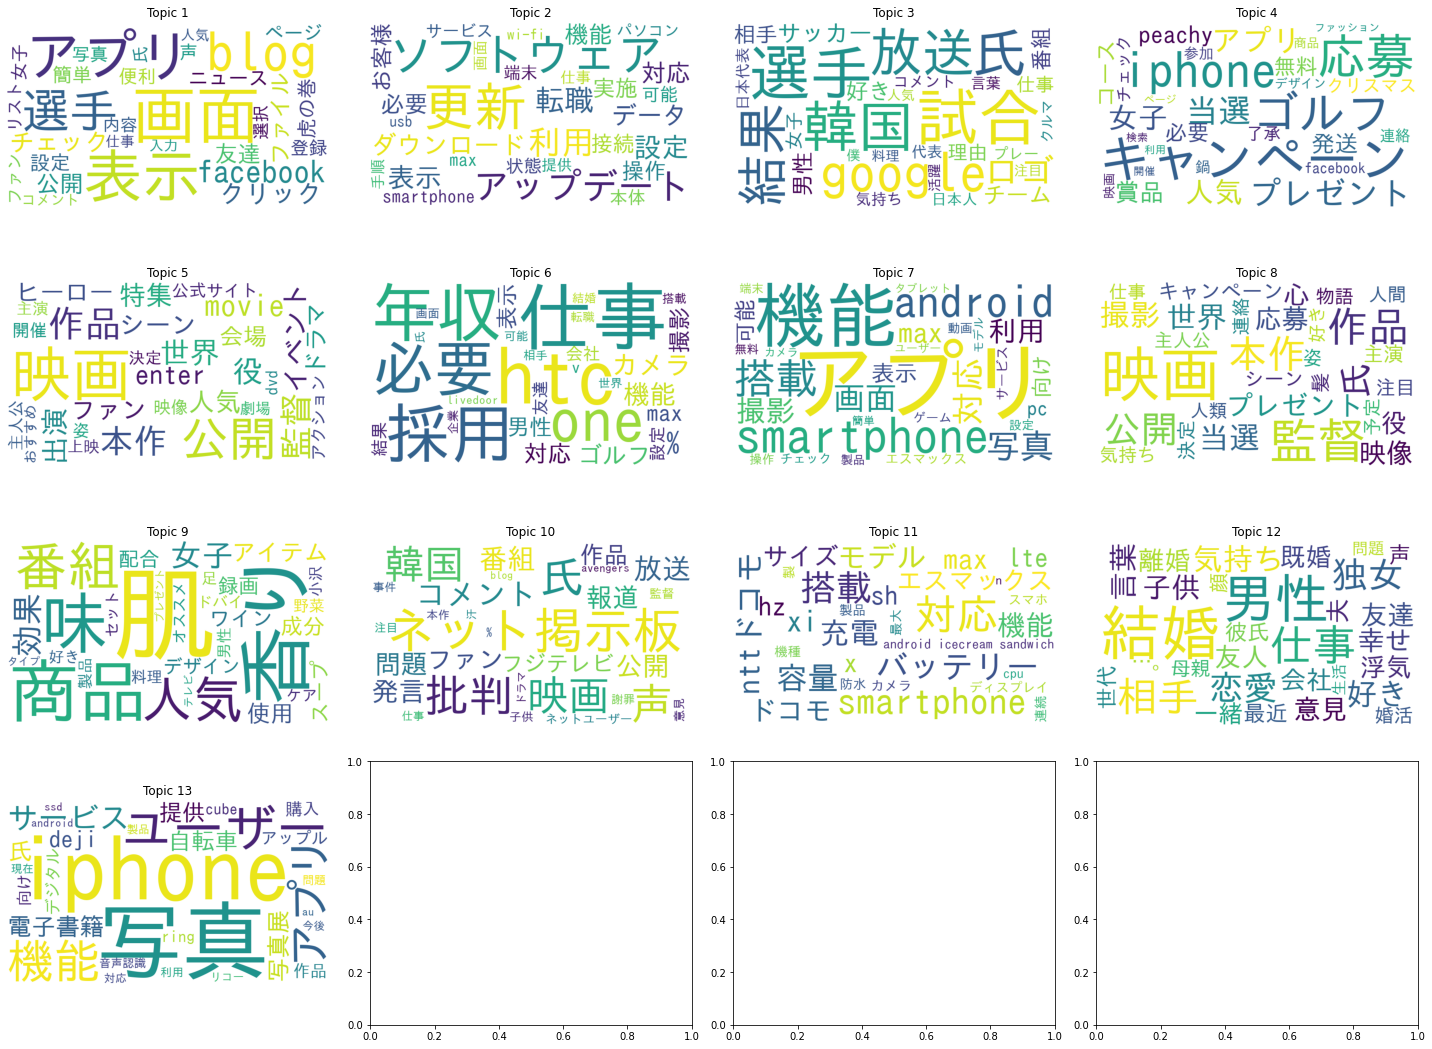

In [111]:
# wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axs = plt.subplots(ncols=4, nrows=int((lda.num_topics+4-1)/4), figsize=(20,15))
axs = axs.flatten()

font_path = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

for i, t in enumerate(range(lda.num_topics)): 
    x = dict(lda.show_topic(t, 30))
    im = WordCloud(
        width=800, height=460,
        background_color='white',
        random_state=0,
        font_path=font_path
    ).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t+1))

plt.tight_layout()
plt.show()

## 機械学習

In [0]:
# データ準備

# カテゴリ
category = {
  'dokujo-tsushin': 0,
  'it-life-hack': 1,
  'kaden-channel': 2,
  'livedoor-homme': 3,
  'movie-enter': 4,
  'peachy': 5,
  'smax': 6,
  'sports-watch': 7,
  'topic-news': 8
}

def data_and_labels(paths, corpus, lda, topic_N):
  data = []
  labels = []
  for i in range(len(paths)):
    # data
    w = [0] * topic_N
    for topic in lda[corpus[i]]:
      w[topic[0]] = topic[1]
    data.append(w)
    # label
    label = category[paths[i].split('/')[2]]
    labels.append(label)
  return data, labels

# トピックモデル構築に使ったデータ
train_data, train_label = data_and_labels(train_article_paths, train_corpus, lda, topic_N)

# テスト用データ
test_data, test_label = data_and_labels(test_article_paths, test_corpus, lda, topic_N)

### ランダムフォレスト

In [118]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(train_data, train_label)

# 精度評価
random_forest.score(test_data, test_label)

0.7060153776571687

### SVM

In [120]:
from sklearn import svm

clf = svm.SVC()
clf.fit(train_data, train_label)

# 精度評価
clf.score(test_data, test_label)

0.7137042062415196

## PCA
トピック分布の次元削減

### 2D

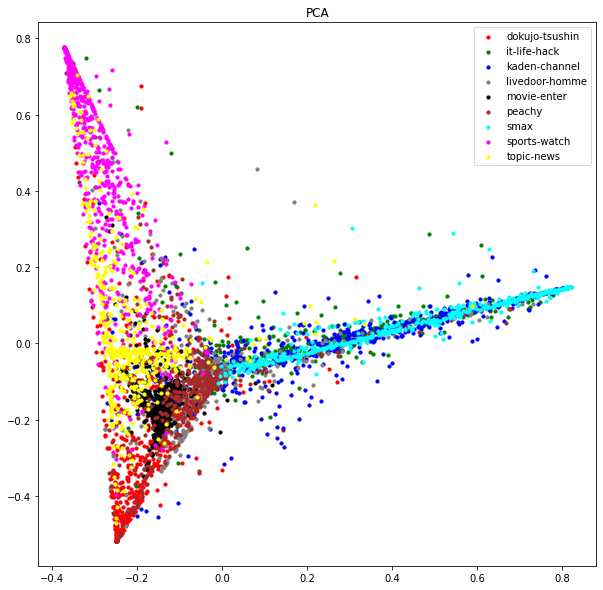

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cmap = plt.get_cmap("tab10")
color = ['red', 'green', 'blue', 'gray', 'black', 'brown', 'cyan', 'magenta', 'yellow']

pca = PCA(n_components=2)
pca_X = pca.fit_transform(train_data)

pca_X_group_x = [[] for i in range(len(category))]
pca_X_group_y = [[] for i in range(len(category))]
for i in range(len(pca_X)):
  pca_X_group_x[train_label[i]].append(pca_X[i][0])
  pca_X_group_y[train_label[i]].append(pca_X[i][1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

for i in range(len(category)):
  ax.scatter(pca_X_group_x[i], pca_X_group_y[i], c=color[i], label=list(category)[i], s=10)

ax.set_title("PCA")
ax.legend()

plt.show()

fig.savefig('pca-2d.png')

In [113]:
evr = pca.explained_variance_ratio_

s = 0
for i in range(len(evr)):
  s += evr[i]
  print(i, ":", s)

0 : 0.18319968459959413
1 : 0.30937920593475654


### 3D

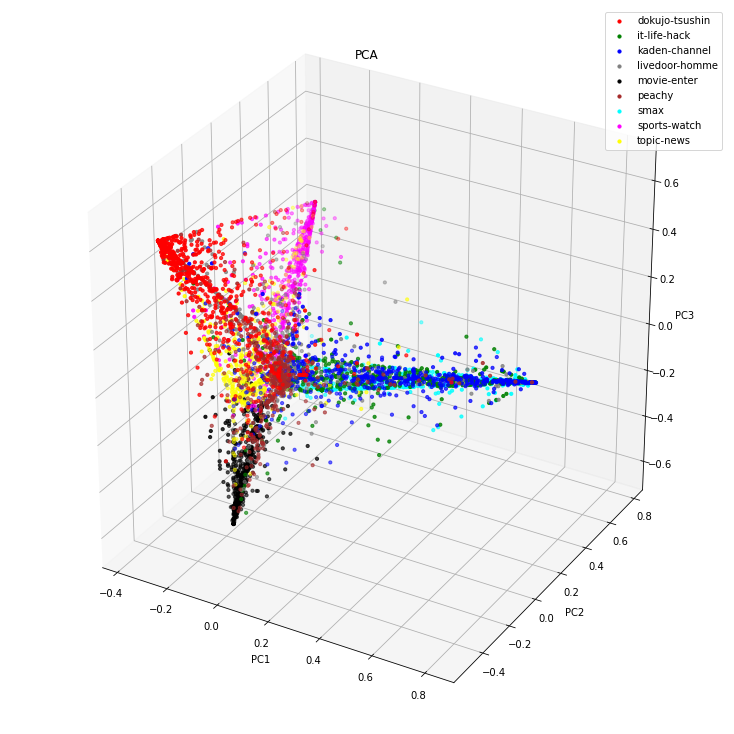

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

cmap = plt.get_cmap("tab10")
color = ['red', 'green', 'blue', 'gray', 'black', 'brown', 'cyan', 'magenta', 'yellow']

pca = PCA(n_components=3)
pca_X = pca.fit_transform(train_data)

pca_X_group_x = [[] for i in range(len(category))]
pca_X_group_y = [[] for i in range(len(category))]
pca_X_group_z = [[] for i in range(len(category))]
for i in range(len(pca_X)):
  pca_X_group_x[train_label[i]].append(pca_X[i][0])
  pca_X_group_y[train_label[i]].append(pca_X[i][1])
  pca_X_group_z[train_label[i]].append(pca_X[i][2])

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

for i in range(len(category)):
  ax.scatter3D(pca_X_group_x[i], pca_X_group_y[i], pca_X_group_z[i], c=color[i], label=list(category)[i], s=10)

ax.set_title("PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

plt.show()

# fig.savefig('pca-3d.png')